# **Loading Complete Data**

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

unclean_data=pd.read_csv('complete_dataset_uncleaned_new.csv')
data3=unclean_data.iloc[:,2:]
data3.index=data3.location
data3.pop('date')
data3.pop('location')

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(data3)
c=data3.columns
i=data3.index

data2 = pd.DataFrame(scaler.transform(data3))

data2.columns=c
data2.index=i
data2=data2.groupby('location').mean()
data2=data2.iloc[:,:-1]
data2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,
Afghanistan,0.000110,0.000450,0.188106,0.019696,0.353820,0.002642,0.009828,0.802514,0.291131,NaN,NaN,0.036232,0.345085
Albania,0.002417,0.002831,0.184590,0.117952,0.551752,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Algeria,0.000148,0.000360,0.177534,0.062370,0.626560,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109
Andorra,0.013005,0.004605,0.174567,0.222609,0.442219,0.007963,NaN,0.046144,0.236290,0.658314,0.427557,0.000000,0.909770
Angola,0.000073,0.000131,0.179183,0.049423,0.632435,0.001156,0.044363,0.304900,0.099865,NaN,NaN,0.000000,0.235136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.001372,0.002678,NaN,0.225971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.796534
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.507320
Yemen,0.000009,0.000161,0.164171,0.004195,0.335638,0.002598,0.007034,0.644345,0.147596,0.170843,0.305398,0.050725,0.383627


In [2]:
seed_value= 123

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
#import os
#os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
#import random
#random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
#import numpy as np
#np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [3]:
"""j=0
importance=pd.read_csv('importance.csv')
importance=np.array(importance)
for i in importance:
  data2.iloc[:,j]=data2.iloc[:,j]*abs(i)
  j=j+1
data2"""

"j=0\nimportance=pd.read_csv('importance.csv')\nimportance=np.array(importance)\nfor i in importance:\n  data2.iloc[:,j]=data2.iloc[:,j]*abs(i)\n  j=j+1\ndata2"

In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [5]:
data2=clean_dataset(data2)
temp_df=data2.iloc[:,5:]
temp_df

,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,
Albania,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Algeria,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109
Argentina,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835
Australia,0.000149,0.378308,0.044060,0.138118,0.293850,0.125000,0.278261,0.901105
Austria,0.005189,0.385084,0.102028,0.181449,0.644647,0.329545,0.534058,0.844338
...,...,...,...,...,...,...,...,...
Vanuatu,0.001096,0.019443,0.723870,0.373392,0.061503,0.380682,0.000000,0.513594
Vietnam,0.014990,0.047393,0.257493,0.169601,0.020501,0.542614,0.188406,0.660890
Yemen,0.002598,0.007034,0.644345,0.147596,0.170843,0.305398,0.050725,0.383627


# **Standardizing Data**

In [6]:
#data=clean_dataset(data.iloc[:,1:])
#data=pd.DataFrame(scaler.inverse_transform(scaled_data))
#data

In [7]:
Ind=pd.DataFrame(temp_df[temp_df.index=='Poland'])
Ind

,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,
Poland,0.00603,0.228384,0.22938,0.166554,0.528474,0.360795,0.47971,0.760382


# Finding Nearest Neighbour of Target Country

In [8]:
dist=[]
a=Ind
from scipy.spatial import distance
for index,row in temp_df.iterrows():
  row=pd.DataFrame(row)
  dst = distance.euclidean(a, row)
  dist.append(dst)

In [9]:
dst_target=pd.DataFrame(dist,temp_df.index)
dst_target.columns=['distance']
dst_target

,distance
location,
Albania,0.571888
Algeria,0.637716
Argentina,0.240978
Australia,0.478222
Austria,0.255873
...,...
Vanuatu,0.916769
Vietnam,0.647679
Yemen,0.823714


In [10]:
dst_target=dst_target.sort_values(by=['distance'])
dst_target

,distance
location,
Poland,0.000000
Hungary,0.142037
Slovakia,0.143424
Estonia,0.185668
Czechia,0.189289
...,...
Sierra Leone,0.977141
Uzbekistan,0.987325
Qatar,1.075775


In [11]:
#X=X.iloc[:,[0,1,3,5,6,7,8,11]]
data = pd.read_csv('complete_dataset_cleaned_new.csv')
data.pop('Pkey')
data.pop('human_development_index')
data.pop('gdp_percentage_weekly')
data=data[data.location!='Romania']
data=data[data.location!='Latvia']
data=data[data.location!='Estonia']
data=data[data.location!='Ireland']
data=data[data.location!='Switzerland']
data=data[data.location!='Malta']

data=data.iloc[:,:-2]
data=data.iloc[:,1:]
data.head()
data

,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Algeria,7/17/2020,13.423,0.113,1.20,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.403
1,Algeria,7/18/2020,13.604,0.249,1.18,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.517
2,Algeria,7/20/2020,13.740,0.204,1.15,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.449
3,Algeria,7/21/2020,13.287,0.294,1.14,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.268
4,Algeria,7/22/2020,13.446,0.249,1.13,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23864,United States,4/26/2022,133.965,0.950,1.22,174.23,28.00,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.706
23865,United States,4/27/2022,266.521,2.386,1.21,174.37,27.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.706
23866,United States,4/28/2022,228.812,1.223,1.21,174.51,27.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.733
23867,United States,4/29/2022,181.817,1.255,1.20,174.67,27.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.822


In [12]:
temp=data.groupby('location').mean()
available=temp.index
available

Index(['Algeria', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Bulgaria', 'Canada', 'Chile', 'Cyprus', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Iceland', 'Israel', 'Italy', 'Japan',
       'Luxembourg', 'Malaysia', 'Netherlands', 'Portugal', 'Serbia',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'United Kingdom', 'United States'],
      dtype='object', name='location')

In [13]:
dst_target=dst_target.loc[dst_target.index.isin(available)]

In [14]:
dst_target

,distance
location,
Slovakia,0.143424
Czechia,0.189289
Argentina,0.240978
Slovenia,0.254159
Austria,0.255873
Belgium,0.256887
Germany,0.267028
France,0.316608
Finland,0.359435


#**Selecting Closest Country**

In [15]:
c=dst_target.index
n1=c[0]

In [16]:
n1

'Slovakia'

In [17]:
data1=data[data['location']==n1]
data1.pop('location')
data1.index=data1.date
data1.pop('date')
data1

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
3/8/2020,0.367,1.310,0.92,0.0,16.67,113.128,30155.152,287.959,7.29,23.1,37.7,5.82,77.54,0.367
3/9/2020,0.367,1.310,0.92,0.0,22.22,113.128,30155.152,287.959,7.29,23.1,37.7,5.82,77.54,0.367
3/10/2020,0.367,1.310,0.92,0.0,33.33,113.128,30155.152,287.959,7.29,23.1,37.7,5.82,77.54,0.367
3/11/2020,0.000,1.310,0.92,0.0,33.33,113.128,30155.152,287.959,7.29,23.1,37.7,5.82,77.54,0.367
3/12/2020,0.551,1.310,0.92,0.0,45.37,113.128,30155.152,287.959,7.29,23.1,37.7,5.82,77.54,0.551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,333.540,1.836,0.66,0.0,14.81,113.128,30155.152,287.959,7.29,23.1,37.7,5.82,77.54,14.502
4/27/2022,690.026,2.019,0.64,0.0,14.81,113.128,30155.152,287.959,7.29,23.1,37.7,5.82,77.54,13.217
4/28/2022,249.834,1.101,0.63,0.0,14.81,113.128,30155.152,287.959,7.29,23.1,37.7,5.82,77.54,13.217


In [18]:
a=data1.index
b=data1.columns
data1=pd.DataFrame(scaler.transform(data1))
data1.index=a
data1.columns=b
df=data1.iloc[:,[0,1,2,3,4,5,13]]
df=clean_dataset(df)
df

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/8/2020,0.000007,0.002365,0.165217,0.0,0.1667,0.005499,0.002035
3/9/2020,0.000007,0.002365,0.165217,0.0,0.2222,0.005499,0.002035
3/10/2020,0.000007,0.002365,0.165217,0.0,0.3333,0.005499,0.002035
3/11/2020,0.000000,0.002365,0.165217,0.0,0.3333,0.005499,0.002035
3/12/2020,0.000011,0.002365,0.165217,0.0,0.4537,0.005499,0.003055
...,...,...,...,...,...,...,...
4/26/2022,0.006550,0.003315,0.120000,0.0,0.1481,0.005499,0.080394
4/27/2022,0.013550,0.003646,0.116522,0.0,0.1481,0.005499,0.073270
4/28/2022,0.004906,0.001988,0.114783,0.0,0.1481,0.005499,0.073270


In [19]:
#data2=unclean_data.iloc[:,3:]
#data2.head()

# **Plot Your Data**

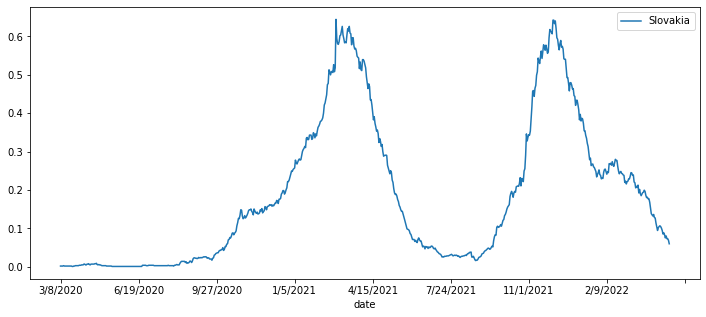

In [20]:
df.icu_patients_per_million.plot(figsize=(12,5), label=n1)
plt.legend(loc="upper right")


# **Check For Stationarity**

In [21]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [22]:
adf_test(df['icu_patients_per_million'])

1. ADF :  -3.1008299279266267
2. P-Value :  0.026491831035629312
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 759
5. Critical Values :
	 1% :  -3.4389949984547465
	 5% :  -2.865355478124818
	 10% :  -2.568801753520772


# **Model for country 1**

In [23]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [25]:
#stepwise_fit = auto_arima(df['icu_patients_per_million'],exog=df.iloc[:,0:5], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True, suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
print(df.shape)
train=df.iloc[:-90,:]
test=df.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(781, 7)
(691, 7) (90, 7)


90
0.1131400754790128


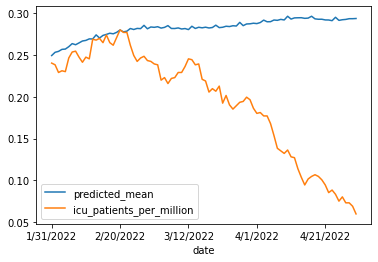

In [26]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(2,0,3),seasonal_order=(0,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:5],start=start,end=end)
pred.index=df.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [27]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(2,0,3),seasonal_order=(0,0,0,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.013


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
35/35 [==============================] - 1s 3ms/step - loss: 2.1374e-04
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 2.1306e-04
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 2.1265e-04
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 2.1357e-04
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 2.1282e-04
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 2.1157e-04
Epoch 7/100
35/35 [==============================] - 0s 6ms/step - loss: 2.1275e-04
Epoch 8/100
35/35 [==============================] - 0s 6ms/step - loss: 2.1197e-04
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 2.1215e-04
Epoch 10/100
35/35 [==============================] - 0s 5ms/step - loss: 2.1201e-04
Epoch 11/100
35/35 [==============================] - 0s 3ms/step - loss: 2.1128e-04
Epoch 12/100
35/35 [==============================] - 0s 4ms/step - loss: 

3/3 [==============================] - 0s 6ms/step


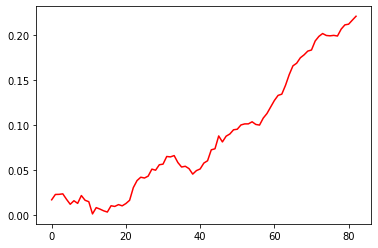

Test MSE: 0.052


In [29]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

In [30]:
pred

,0
0,0.017149
1,0.023067
2,0.023183
3,0.023743
4,0.017696
...,...
78,0.206161
79,0.210853
80,0.211616
81,0.216066


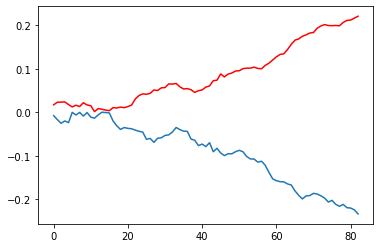

Test MSE: 0.052


In [31]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.044


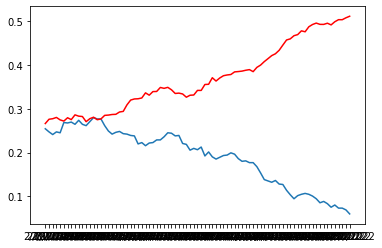

In [32]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 1NN**


In [33]:
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173549,Zimbabwe44677,Africa,Zimbabwe,4/26/2022,4.314,0.063,1.05,63.05,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173550,Zimbabwe44678,Africa,Zimbabwe,4/27/2022,3.877,0.000,1.06,63.10,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173551,Zimbabwe44679,Africa,Zimbabwe,4/28/2022,3.439,0.000,1.08,63.31,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173552,Zimbabwe44680,Africa,Zimbabwe,4/29/2022,3.626,0.000,1.09,63.43,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [34]:
data4=unclean_data[unclean_data.location=='Poland']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')


date
3/4/2020      3/4/2020
3/5/2020      3/5/2020
3/6/2020      3/6/2020
3/7/2020      3/7/2020
3/8/2020      3/8/2020
               ...    
4/26/2022    4/26/2022
4/27/2022    4/27/2022
4/28/2022    4/28/2022
4/29/2022    4/29/2022
4/30/2022    4/30/2022
Name: date, Length: 788, dtype: object

In [35]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b


In [36]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]


In [37]:
df

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/4/2020,5.105559e-07,NaN,NaN,NaN,0.1111,0.00603,NaN
3/5/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.00603,NaN
3/6/2020,2.042224e-06,NaN,NaN,NaN,0.1111,0.00603,NaN
3/7/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.00603,NaN
3/8/2020,3.082972e-06,NaN,NaN,NaN,0.1111,0.00603,NaN
...,...,...,...,...,...,...,...
4/26/2022,6.951022e-04,0.001367,0.146087,0.385668,0.1481,0.00603,NaN
4/27/2022,5.336291e-04,0.000990,0.144348,NaN,0.1481,0.00603,NaN
4/28/2022,4.905657e-04,0.001132,0.139130,0.385831,0.1481,0.00603,NaN


In [38]:
df=df.iloc[:,:-1]
df=clean_dataset(df)

#Severity
#df.iloc[:,1]=df.iloc[:,1]*2
#reproduction rate
#df.iloc[:,2]=df.iloc[:,2]*2

traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

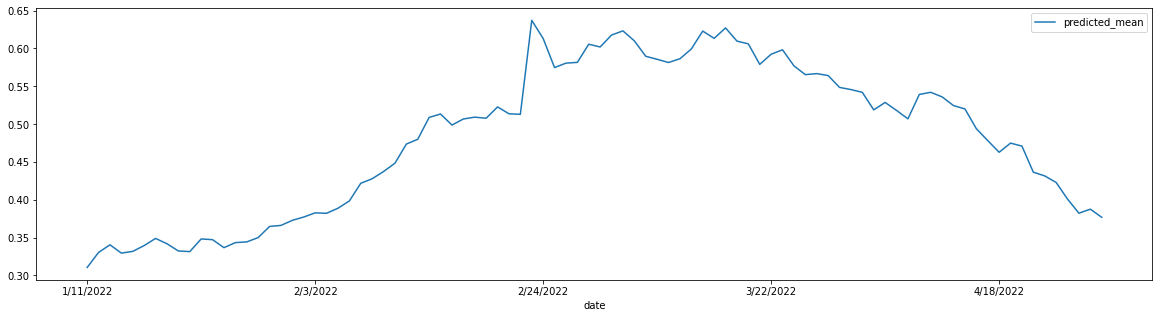

In [39]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(2,0,3),seasonal_order=(0,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:5],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [40]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
pred


,predicted_mean
date,
1/20/2022,0.341738
1/21/2022,0.332187
1/22/2022,0.331339
1/23/2022,0.348112
1/24/2022,0.347120
...,...
4/25/2022,0.422858
4/26/2022,0.400823
4/28/2022,0.382146


In [41]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.3588864]
[0.35525331]
[0.35452262]
[0.37185504]
[0.3648163]
[0.3487692]
[0.35935498]
[0.35738792]
[0.37175105]
[0.38125731]
[0.38105651]
[0.37426036]
[0.38554873]
[0.3894994]
[0.38698286]
[0.39229714]
[0.40888966]
[0.43152265]
[0.43957556]
[0.44775249]
[0.46129234]
[0.49019187]
[0.51057301]
[0.54729783]
[0.55547873]
[0.53998011]
[0.55013149]
[0.56029984]
[0.55770178]
[0.57868392]
[0.57029673]
[0.57803254]
[0.70188256]
[0.67936794]
[0.6332162]
[0.63407797]
[0.63591259]
[0.65733517]
[0.64757982]
[0.66727105]
[0.67459054]
[0.66793332]
[0.6500984]
[0.65818256]
[0.6551074]
[0.67429779]
[0.68061236]
[0.71065425]
[0.70343091]
[0.72187536]
[0.70507871]
[0.70611101]
[0.68017577]
[0.69365856]
[0.70181726]
[0.67762028]
[0.66531069]
[0.67437322]
[0.67689881]
[0.66843524]
[0.6727823]
[0.67476273]
[0.65294454]
[0.67257632]
[0.67389839]
[0.67243185]
[0.70761742]
[0.71648514]
[0.71361322]
[0.70625872]
[0.70312482]
[0.68700149]
[0.676343]
[0.66397868]
[0.67394457]
[0.66963957]
[0.6356336]
[0.6299681

In [42]:
p1=pred_final

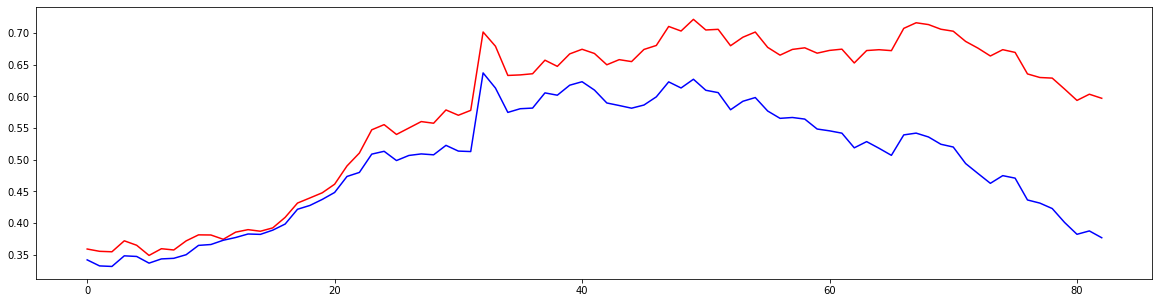

In [43]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

# **Model for country 2**

In [44]:
n2=c[1]
n2

'Czechia'

In [45]:
data5=data[data['location']==n2]
data5.pop('location')
data5.index=data5.date
data5.pop('date')

date
3/16/2020    3/16/2020
3/17/2020    3/17/2020
3/18/2020    3/18/2020
3/19/2020    3/19/2020
3/20/2020    3/20/2020
               ...    
4/26/2022    4/26/2022
4/27/2022    4/27/2022
4/28/2022    4/28/2022
4/29/2022    4/29/2022
4/30/2022    4/30/2022
Name: date, Length: 776, dtype: object

In [46]:
a=data5.index
b=data5.columns
data5=pd.DataFrame(scaler.transform(data5))
data5.index=a
data5.columns=b
df2=data5.iloc[:,[0,1,2,3,4,5,13]]
df2=clean_dataset(df2)
df2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/16/2020,0.000084,0.000000,0.396522,0.000000,0.7963,0.00667,0.001580
3/17/2020,0.000183,0.000000,0.394783,0.000000,0.7963,0.00667,0.003692
3/18/2020,0.000127,0.000000,0.389565,0.000000,0.7963,0.00667,0.004745
3/19/2020,0.000430,0.000000,0.384348,0.000000,0.7963,0.00667,0.005272
3/20/2020,0.000260,0.000000,0.372174,0.000000,0.7963,0.00667,0.008437
...,...,...,...,...,...,...,...
4/26/2022,0.003808,0.002062,0.120000,0.455611,0.1481,0.00667,0.039559
4/27/2022,0.003084,0.001546,0.120000,0.455665,0.1481,0.00667,0.032702
4/28/2022,0.002922,0.003436,0.118261,0.455747,0.1481,0.00667,0.029010


In [47]:
#stepwise_fit = auto_arima(df2['icu_patients_per_million'],exog=df2.iloc[:,0:5], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
print(df2.shape)
train=df2.iloc[:-90,:]
test=df2.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(776, 7)
(686, 7) (90, 7)


90
0.5422025076205982


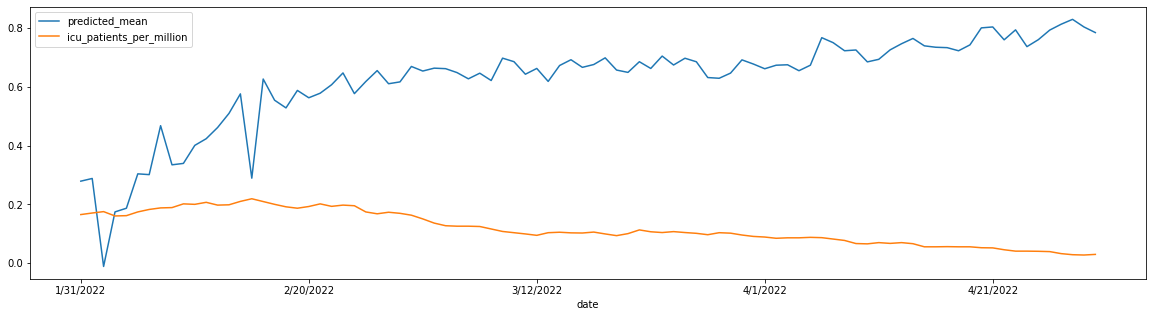

In [48]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(2,0,4),seasonal_order=(2,0,2,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:5],start=start,end=end)
pred.index=df2.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [49]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(2,0,4),seasonal_order=(2,0,2,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.294


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [50]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="relu"))
model.add(Dense(25,  activation="relu"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 0.0018
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 12/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 13/100
34/34 [=================

3/3 [==============================] - 0s 3ms/step


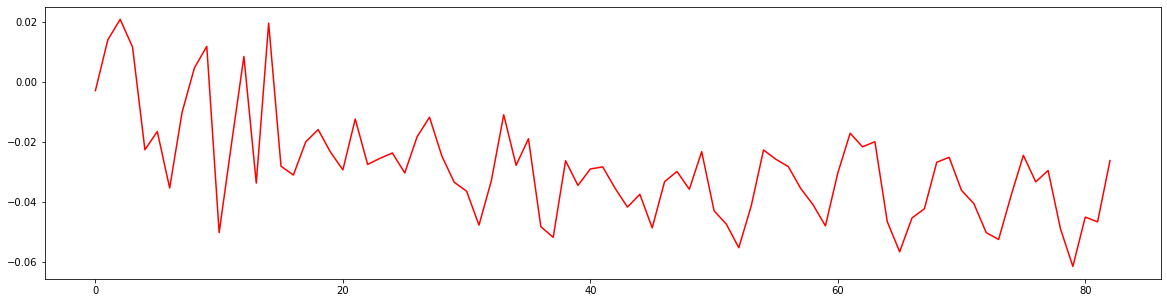

Test MSE: 0.284


In [51]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

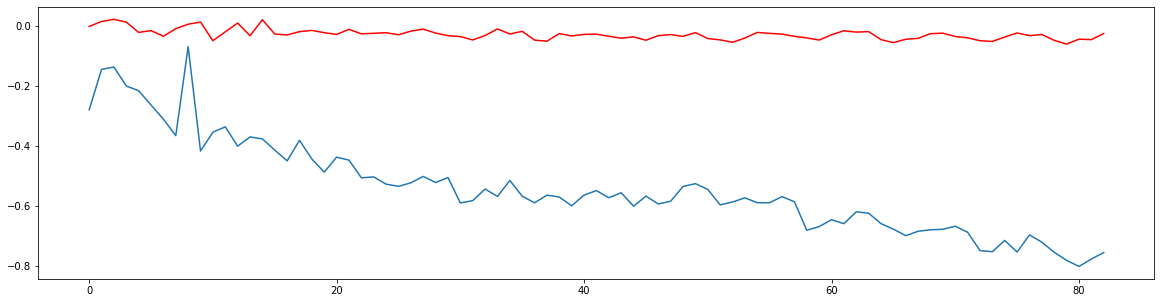

Test MSE: 0.284


In [52]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.240


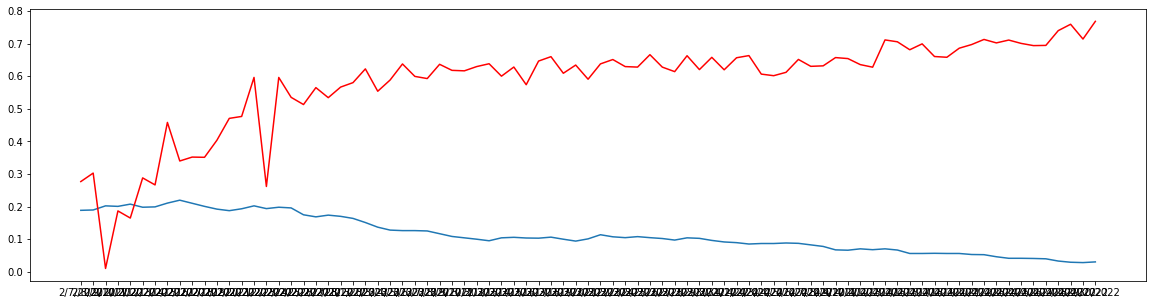

In [53]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 2NN**


In [54]:
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173549,Zimbabwe44677,Africa,Zimbabwe,4/26/2022,4.314,0.063,1.05,63.05,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173550,Zimbabwe44678,Africa,Zimbabwe,4/27/2022,3.877,0.000,1.06,63.10,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173551,Zimbabwe44679,Africa,Zimbabwe,4/28/2022,3.439,0.000,1.08,63.31,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173552,Zimbabwe44680,Africa,Zimbabwe,4/29/2022,3.626,0.000,1.09,63.43,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [55]:
data4=unclean_data[unclean_data.location=='Poland']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')
data4

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
3/4/2020,0.026,NaN,NaN,NaN,11.11,124.027,27216.445,227.331,5.91,23.3,33.1,6.62,78.73,NaN
3/5/2020,0.000,NaN,NaN,NaN,11.11,124.027,27216.445,227.331,5.91,23.3,33.1,6.62,78.73,NaN
3/6/2020,0.104,NaN,NaN,NaN,11.11,124.027,27216.445,227.331,5.91,23.3,33.1,6.62,78.73,NaN
3/7/2020,0.000,NaN,NaN,NaN,11.11,124.027,27216.445,227.331,5.91,23.3,33.1,6.62,78.73,NaN
3/8/2020,0.157,NaN,NaN,NaN,11.11,124.027,27216.445,227.331,5.91,23.3,33.1,6.62,78.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,35.398,0.757,0.81,141.49,14.81,124.027,27216.445,227.331,5.91,23.3,33.1,6.62,78.73,NaN
4/27/2022,27.175,0.548,0.80,NaN,14.81,124.027,27216.445,227.331,5.91,23.3,33.1,6.62,78.73,NaN
4/28/2022,24.982,0.627,0.77,141.55,14.81,124.027,27216.445,227.331,5.91,23.3,33.1,6.62,78.73,NaN


In [56]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b
data4

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
3/4/2020,5.105559e-07,NaN,NaN,NaN,0.1111,0.00603,0.228384,0.22938,0.166554,0.528474,0.360795,0.47971,0.760382,NaN
3/5/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.00603,0.228384,0.22938,0.166554,0.528474,0.360795,0.47971,0.760382,NaN
3/6/2020,2.042224e-06,NaN,NaN,NaN,0.1111,0.00603,0.228384,0.22938,0.166554,0.528474,0.360795,0.47971,0.760382,NaN
3/7/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.00603,0.228384,0.22938,0.166554,0.528474,0.360795,0.47971,0.760382,NaN
3/8/2020,3.082972e-06,NaN,NaN,NaN,0.1111,0.00603,0.228384,0.22938,0.166554,0.528474,0.360795,0.47971,0.760382,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,6.951022e-04,0.001367,0.146087,0.385668,0.1481,0.00603,0.228384,0.22938,0.166554,0.528474,0.360795,0.47971,0.760382,NaN
4/27/2022,5.336291e-04,0.000990,0.144348,NaN,0.1481,0.00603,0.228384,0.22938,0.166554,0.528474,0.360795,0.47971,0.760382,NaN
4/28/2022,4.905657e-04,0.001132,0.139130,0.385831,0.1481,0.00603,0.228384,0.22938,0.166554,0.528474,0.360795,0.47971,0.760382,NaN


In [57]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]
df

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/4/2020,5.105559e-07,NaN,NaN,NaN,0.1111,0.00603,NaN
3/5/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.00603,NaN
3/6/2020,2.042224e-06,NaN,NaN,NaN,0.1111,0.00603,NaN
3/7/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.00603,NaN
3/8/2020,3.082972e-06,NaN,NaN,NaN,0.1111,0.00603,NaN
...,...,...,...,...,...,...,...
4/26/2022,6.951022e-04,0.001367,0.146087,0.385668,0.1481,0.00603,NaN
4/27/2022,5.336291e-04,0.000990,0.144348,NaN,0.1481,0.00603,NaN
4/28/2022,4.905657e-04,0.001132,0.139130,0.385831,0.1481,0.00603,NaN


In [58]:
df=df.iloc[:,:-1]
df=clean_dataset(df)
#Severity
#df.iloc[:,1]=df.iloc[:,1]*2

#Reproduction Rate
#df.iloc[:,2]=df.iloc[:,2]*2


In [59]:
traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

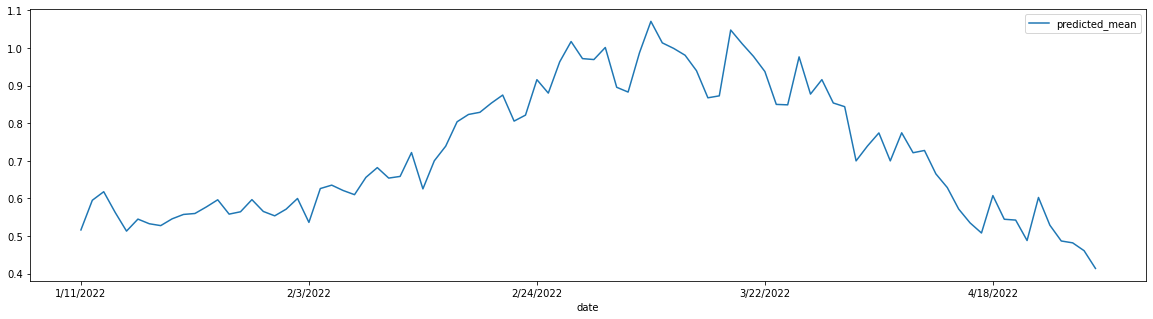

In [60]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(2,0,4),seasonal_order=(2,0,2,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:5],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [61]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


0    -0.002808
1     0.014082
2     0.020924
3     0.011698
4    -0.022537
        ...   
78   -0.048878
79   -0.061414
80   -0.044979
81   -0.046555
82   -0.026147
Name: 0, Length: 83, dtype: float32

In [62]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.52492235]
[0.55983793]
[0.5783823]
[0.57165176]
[0.55480869]
[0.579978]
[0.5230057]
[0.55443184]
[0.60157675]
[0.57729028]
[0.50361095]
[0.55097115]
[0.60840371]
[0.50271277]
[0.64593604]
[0.60733272]
[0.59017027]
[0.59012208]
[0.6401946]
[0.65862833]
[0.62488551]
[0.64626465]
[0.69457792]
[0.60004876]
[0.67648753]
[0.70875254]
[0.78566561]
[0.81161856]
[0.80440605]
[0.82003912]
[0.83853598]
[0.75799714]
[0.7887464]
[0.90495299]
[0.85238298]
[0.94434772]
[0.96907059]
[0.92008519]
[0.9430928]
[0.96699085]
[0.86663662]
[0.85461085]
[0.9521235]
[1.02922222]
[0.97631885]
[0.95036765]
[0.94754617]
[0.90984657]
[0.83188657]
[0.84961646]
[1.00496649]
[0.96413329]
[0.92254548]
[0.89611436]
[0.82743716]
[0.82316007]
[0.9482715]
[0.84208704]
[0.87502856]
[0.80591601]
[0.81368123]
[0.68286165]
[0.71789171]
[0.75435095]
[0.65337894]
[0.71799589]
[0.67626702]
[0.68532649]
[0.63860468]
[0.60390893]
[0.53569907]
[0.49447419]
[0.45793482]
[0.55511513]
[0.50674537]
[0.51805452]
[0.45484538]
[0.57313

In [63]:
p2=pred_final

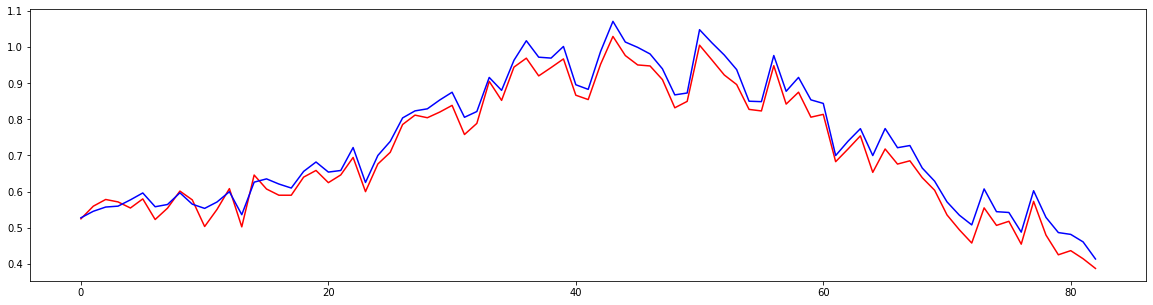

In [64]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

# **Model for country 3**

In [65]:
n3=c[2]
n3

'Argentina'

In [66]:
data6=data[data['location']==n3]
data6.pop('location')
data6.index=data6.date
data6.pop('date')
data6

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
7/1/2020,58.904,0.972,1.18,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,12.722
7/2/2020,60.605,0.751,1.18,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,13.119
7/3/2020,62.836,1.148,1.18,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,13.694
7/4/2020,57.204,0.972,1.18,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,14.069
7/5/2020,53.869,0.574,1.19,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,14.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/14/2022,31.539,0.464,0.55,216.53,17.67,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,9.100
4/15/2022,13.097,0.464,0.47,216.55,17.67,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,9.100
4/16/2022,12.170,0.375,0.40,216.60,17.67,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,9.100


In [67]:
a=data6.index
b=data6.columns
data6=pd.DataFrame(scaler.transform(data6))
data6.index=a
data6.columns=b
df3=data6.iloc[:,[0,1,2,3,4,5,13]]
df3=clean_dataset(df3)
df3

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
7/1/2020,0.001157,0.001755,0.210435,0.000000,0.9259,0.000781,0.070526
7/2/2020,0.001190,0.001356,0.210435,0.000000,0.9259,0.000781,0.072727
7/3/2020,0.001234,0.002073,0.210435,0.000000,0.9259,0.000781,0.075915
7/4/2020,0.001123,0.001755,0.210435,0.000000,0.9259,0.000781,0.077993
7/5/2020,0.001058,0.001036,0.212174,0.000000,0.9259,0.000781,0.080566
...,...,...,...,...,...,...,...
4/14/2022,0.000619,0.000838,0.100870,0.590209,0.1767,0.000781,0.050447
4/15/2022,0.000257,0.000838,0.086957,0.590264,0.1767,0.000781,0.050447
4/16/2022,0.000239,0.000677,0.074783,0.590400,0.1767,0.000781,0.050447


In [68]:
#stepwise_fit = auto_arima(df3['icu_patients_per_million'],exog=df3.iloc[:,0:5], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
print(df3.shape)
train=df3.iloc[:-90,:]
test=df3.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(647, 7)
(557, 7) (90, 7)


90
0.1934545757507037


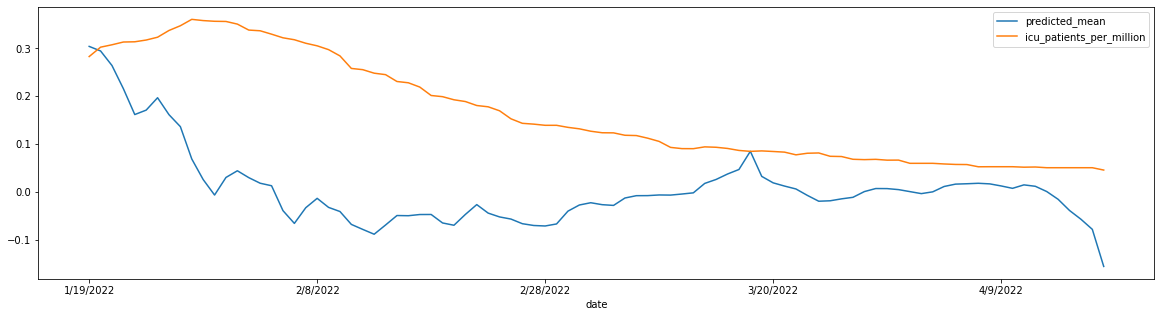

In [69]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(2,0,2),seasonal_order=(0,0,1,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:5],start=start,end=end)
pred.index=df3.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [70]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(2,0,2),seasonal_order=(0,0,1,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.037


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [71]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="relu"))
model.add(Dense(25,  activation="relu"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
28/28 [==============================] - 0s 2ms/step - loss: 2.7647e-04
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 2.7478e-04
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 2.7372e-04
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 2.7299e-04
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 2.7250e-04
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 2.7161e-04
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 2.7165e-04
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 2.7085e-04
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 2.7046e-04
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 2.7017e-04
Epoch 11/100
28/28 [==============================] - 0s 2ms/step - loss: 2.6965e-04
Epoch 12/100
28/28 [==============================] - 0s 1ms/step - loss: 

3/3 [==============================] - 0s 3ms/step


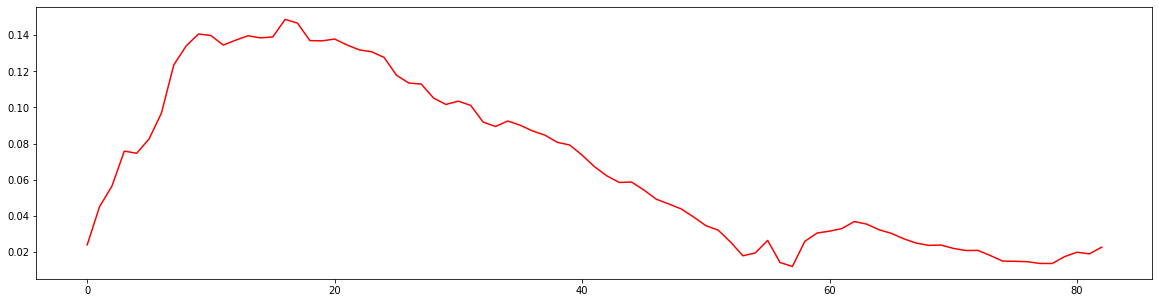

Test MSE: 0.015


In [72]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

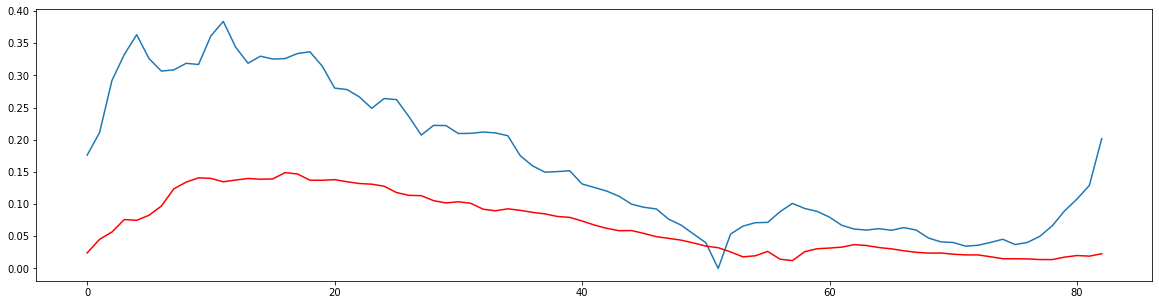

Test MSE: 0.015


In [73]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.014


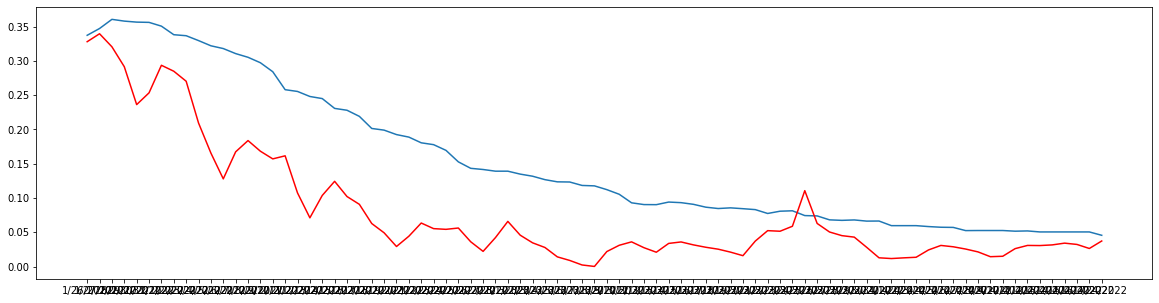

In [74]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 3NN**


In [75]:
data4=unclean_data[unclean_data.location=='Poland']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')


date
3/4/2020      3/4/2020
3/5/2020      3/5/2020
3/6/2020      3/6/2020
3/7/2020      3/7/2020
3/8/2020      3/8/2020
               ...    
4/26/2022    4/26/2022
4/27/2022    4/27/2022
4/28/2022    4/28/2022
4/29/2022    4/29/2022
4/30/2022    4/30/2022
Name: date, Length: 788, dtype: object

In [76]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b

In [77]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]

In [78]:
df=df.iloc[:,:-1]
df=clean_dataset(df)
#Severity
#df.iloc[:,1]=df.iloc[:,1]*2

#Reproduction Rate
#df.iloc[:,2]=df.iloc[:,2]*2


In [79]:
traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

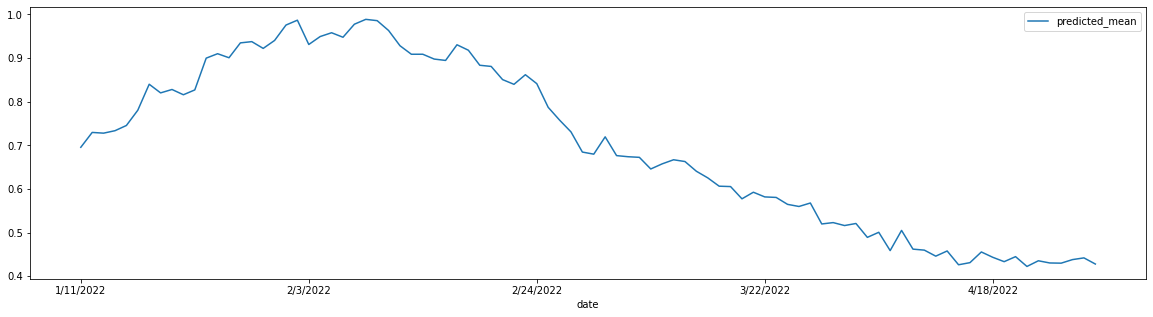

In [80]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(2,0,2),seasonal_order=(0,0,1,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:5],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [81]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


0     0.023956
1     0.045063
2     0.056454
3     0.075817
4     0.074651
        ...   
78    0.013634
79    0.017436
80    0.019871
81    0.018969
82    0.022676
Name: 0, Length: 83, dtype: float32

In [82]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.84416753]
[0.87306708]
[0.87239154]
[0.90283565]
[0.97445661]
[0.99250399]
[0.99757224]
[1.05833812]
[1.07166565]
[1.06281657]
[1.08016182]
[1.11015972]
[1.12399323]
[1.07078168]
[1.08783696]
[1.09702978]
[1.09645153]
[1.12422143]
[1.12568368]
[1.12255825]
[1.10101455]
[1.06281985]
[1.04056514]
[1.039568]
[1.02538714]
[1.01236669]
[1.04395327]
[1.0308876]
[0.98867804]
[0.9824933]
[0.95413419]
[0.94093787]
[0.95376915]
[0.93081399]
[0.8796653]
[0.84800639]
[0.81782861]
[0.76927744]
[0.7604993]
[0.79871777]
[0.75010493]
[0.74116676]
[0.73468599]
[0.70433737]
[0.71631642]
[0.72125196]
[0.71212248]
[0.68726143]
[0.66935433]
[0.6458729]
[0.64017941]
[0.60958253]
[0.61812682]
[0.59975192]
[0.60014695]
[0.59117412]
[0.57412618]
[0.57989943]
[0.54576221]
[0.55350624]
[0.54777512]
[0.55395101]
[0.5260235]
[0.53623978]
[0.49113425]
[0.53541003]
[0.48950613]
[0.48486387]
[0.46978937]
[0.48183396]
[0.4483838]
[0.45208215]
[0.4765669]
[0.46155165]
[0.44844513]
[0.45984272]
[0.4371584]
[0.4491892

In [83]:
p3=pred_final
pred_final

[array([0.84416753]),
 array([0.87306708]),
 array([0.87239154]),
 array([0.90283565]),
 array([0.97445661]),
 array([0.99250399]),
 array([0.99757224]),
 array([1.05833812]),
 array([1.07166565]),
 array([1.06281657]),
 array([1.08016182]),
 array([1.11015972]),
 array([1.12399323]),
 array([1.07078168]),
 array([1.08783696]),
 array([1.09702978]),
 array([1.09645153]),
 array([1.12422143]),
 array([1.12568368]),
 array([1.12255825]),
 array([1.10101455]),
 array([1.06281985]),
 array([1.04056514]),
 array([1.039568]),
 array([1.02538714]),
 array([1.01236669]),
 array([1.04395327]),
 array([1.0308876]),
 array([0.98867804]),
 array([0.9824933]),
 array([0.95413419]),
 array([0.94093787]),
 array([0.95376915]),
 array([0.93081399]),
 array([0.8796653]),
 array([0.84800639]),
 array([0.81782861]),
 array([0.76927744]),
 array([0.7604993]),
 array([0.79871777]),
 array([0.75010493]),
 array([0.74116676]),
 array([0.73468599]),
 array([0.70433737]),
 array([0.71631642]),
 array([0.721251

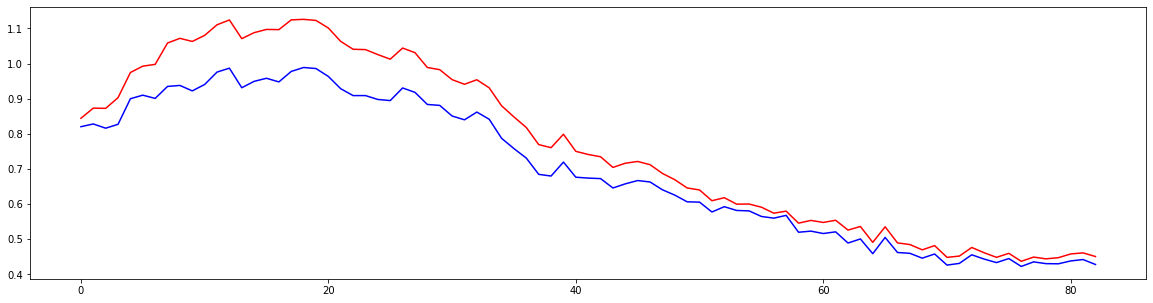

In [84]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

#**Exporting Results**

In [85]:
tmp=data1.iloc[-83:,:]

In [86]:
p1=list(p1)
p2=list(p2)
p3=list(p3)

In [87]:
tmp

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
2/7/2022,0.046453,0.004971,0.229565,0.0,0.4241,0.005499,0.253658,0.32337,0.21327,0.523918,0.426136,0.421739,0.724828,0.254409
2/8/2022,0.092178,0.007291,0.222609,0.0,0.4241,0.005499,0.253658,0.32337,0.21327,0.523918,0.426136,0.421739,0.724828,0.247285
2/9/2022,0.079205,0.006298,0.215652,0.0,0.4241,0.005499,0.253658,0.32337,0.21327,0.523918,0.426136,0.421739,0.724828,0.241176
2/10/2022,0.101781,0.008619,0.212174,0.0,0.4241,0.005499,0.253658,0.32337,0.21327,0.523918,0.426136,0.421739,0.724828,0.247285
2/11/2022,0.087889,0.007956,0.206957,0.0,0.4241,0.005499,0.253658,0.32337,0.21327,0.523918,0.426136,0.421739,0.724828,0.245245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,0.006550,0.003315,0.120000,0.0,0.1481,0.005499,0.253658,0.32337,0.21327,0.523918,0.426136,0.421739,0.724828,0.080394
4/27/2022,0.013550,0.003646,0.116522,0.0,0.1481,0.005499,0.253658,0.32337,0.21327,0.523918,0.426136,0.421739,0.724828,0.073270
4/28/2022,0.004906,0.001988,0.114783,0.0,0.1481,0.005499,0.253658,0.32337,0.21327,0.523918,0.426136,0.421739,0.724828,0.073270


In [88]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p1[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p1=jnk.iloc[:,-1]
p1

0      64.738441
1      64.083080
2      63.951271
3      67.077815
4      65.808119
         ...    
78    113.466970
79    110.338411
80    107.107079
81    108.872420
82    107.712997
Name: 13, Length: 83, dtype: float64

In [89]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p2[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p2=jnk.iloc[:,-1]
p2

0      94.689168
1     100.987485
2     104.332647
3     103.118546
4     100.080276
         ...    
78     86.576597
79     76.745099
80     78.810994
81     74.777544
82     69.935296
Name: 13, Length: 83, dtype: float64

In [90]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p3[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p3=jnk.iloc[:,-1]
p3

0     152.276848
1     157.489951
2     157.368093
3     162.859814
4     175.779305
         ...    
78     80.117412
79     80.722534
80     82.638377
81     83.180169
82     81.309144
Name: 13, Length: 83, dtype: float64

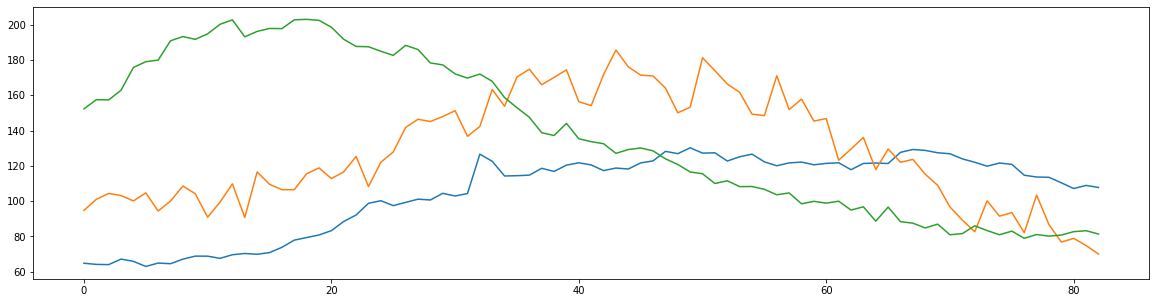

In [91]:
plt.plot(p1)
plt.plot(p2)
plt.plot(p3)
plt.show()

In [92]:
final={c[0]:p1,c[1]:p2,c[2]:p3}
final=pd.DataFrame(final)
final.to_csv('Output_2023_01_31.csv')